In [20]:
# required imports
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
import graphviz
from IPython.display import Image  

In [21]:
data = pd.read_csv('C:/Users/goldy/Music/Decision tree/winequality_red.csv')

In [22]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
#seperating feature and target columns
X = data.drop(columns = 'quality')
y = data['quality']

In [26]:
#splitting data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=355)

In [27]:
#training decision Tree on train data
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
X_train.iloc[1]

fixed acidity            8.8000
volatile acidity         0.6000
citric acid              0.2900
residual sugar           2.2000
chlorides                0.0980
free sulfur dioxide      5.0000
total sulfur dioxide    15.0000
density                  0.9988
pH                       3.3600
sulphates                0.4900
alcohol                  9.1000
Name: 627, dtype: float64

In [33]:
clf.predict([X_train.iloc[1]])

array([5], dtype=int64)

In [18]:
import matplotlib.pyplot as plt

[Text(687.0950626723086, 1063.5652173913045, 'X[10] <= 10.35\ngini = 0.648\nsamples = 1119\nvalue = [8, 36, 468, 446, 145, 16]'),
 Text(413.1925888057682, 1016.2956521739131, 'X[6] <= 58.5\ngini = 0.521\nsamples = 604\nvalue = [5, 19, 373, 187, 18, 2]'),
 Text(259.36569022546456, 969.0260869565218, 'X[1] <= 0.572\ngini = 0.584\nsamples = 386\nvalue = [5, 15, 198, 149, 17, 2]'),
 Text(104.59514577773302, 921.7565217391304, 'X[9] <= 0.585\ngini = 0.584\nsamples = 217\nvalue = [1, 6, 84, 111, 13, 2]'),
 Text(50.57656478171107, 874.4869565217392, 'X[10] <= 9.75\ngini = 0.531\nsamples = 71\nvalue = [0, 5, 42, 24, 0, 0]'),
 Text(33.717709854474045, 827.2173913043479, 'X[5] <= 16.0\ngini = 0.437\nsamples = 43\nvalue = [0, 4, 31, 8, 0, 0]'),
 Text(17.982778589052824, 779.9478260869566, 'X[9] <= 0.435\ngini = 0.349\nsamples = 38\nvalue = [0, 2, 30, 6, 0, 0]'),
 Text(8.991389294526412, 732.6782608695653, 'X[10] <= 9.375\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(4.495694647263

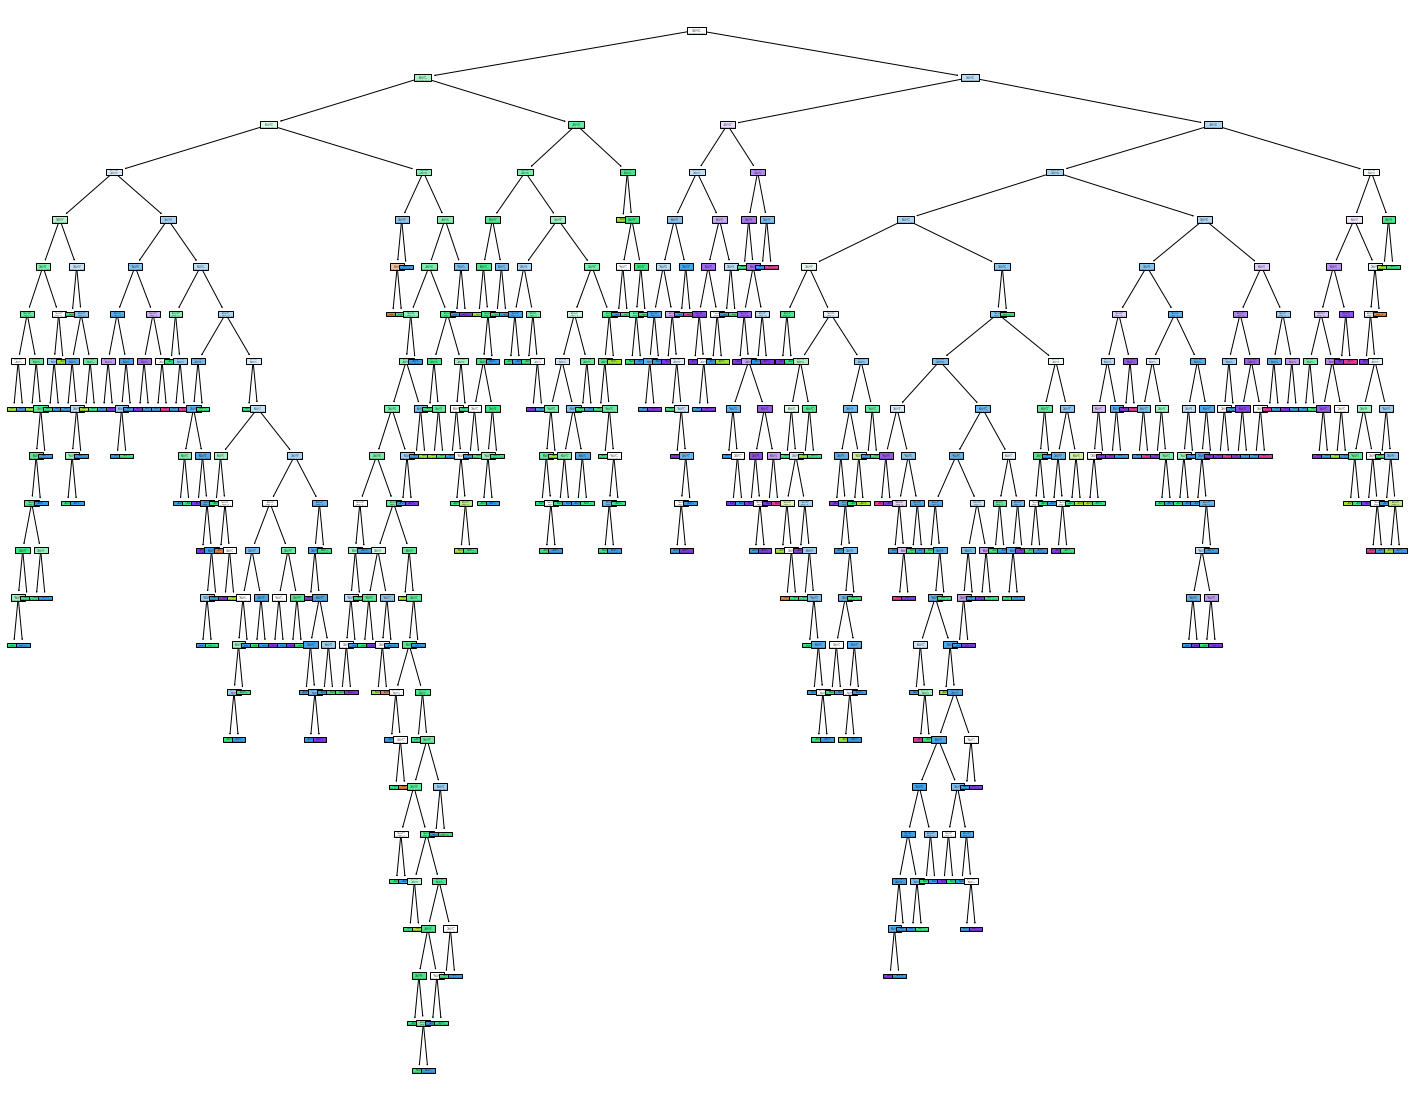

In [21]:
#visualizing DT
plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled = True)

In [24]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=63e81fb5afd5f778250da88145bc5a0cc1b70517102370f78a4bb541bb636581
  Stored in directory: c:\users\goldy\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [39]:
#Visualizing DT
import pydotplus
feature_name = list(X.columns)
#creating dot file
dot_data = export_graphviz(clf,feature_names = feature_name, rounded=True, filled=True)
#draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_png('myTree.png')
#show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [30]:
clf.score(X_train,y_train)

1.0

In [31]:
clf_pred = clf.predict(X_test)

In [16]:
#accuracy of DT model
clf.score(X_test,y_test)

0.6479166666666667

In [18]:
import pickle
with open('DTmodelforPred.sav','wb') as f:
    pickle.dump(clf,f)

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [9]:
x_train,x_test,y_train,y_test= train_test_split(x_transform,y,test_size=0.3,random_state=355)

In [49]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [50]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [51]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [53]:
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}


In [56]:
clf1= DecisionTreeClassifier(criterion = 'entropy', max_depth=27, min_samples_leaf=1, min_samples_split=3, splitter='random')

In [57]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=27, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [58]:
clf1.score(X_test,y_test)

0.5770833333333333

In [64]:
clf2= DecisionTreeClassifier(criterion = 'entropy', max_depth=27, min_samples_leaf=1, min_samples_split=3, splitter='random')
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=27, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [65]:
clf2.score(x_test,y_test)

0.6083333333333333

In [19]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
Click==7.0
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
comtypes==1.1.7
conda==4.8.2
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
confuse==1.3.0
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.15
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
docutils==0.16
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
flake8==3.7.9
Flask==1